# 3) Hierarchical Clustering

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [82]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
display(df.shape)
df.head()

(150, 5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
دیتای را می خوانیم و آن را به دیتافریم پانداس تبدیل می کنیم.</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## a)

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [84]:
Z = linkage(df, 'ward')

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
متد لینکیج را با روش ward که ترکیبی از minوmax بود اجرا می کنمی.</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## b)

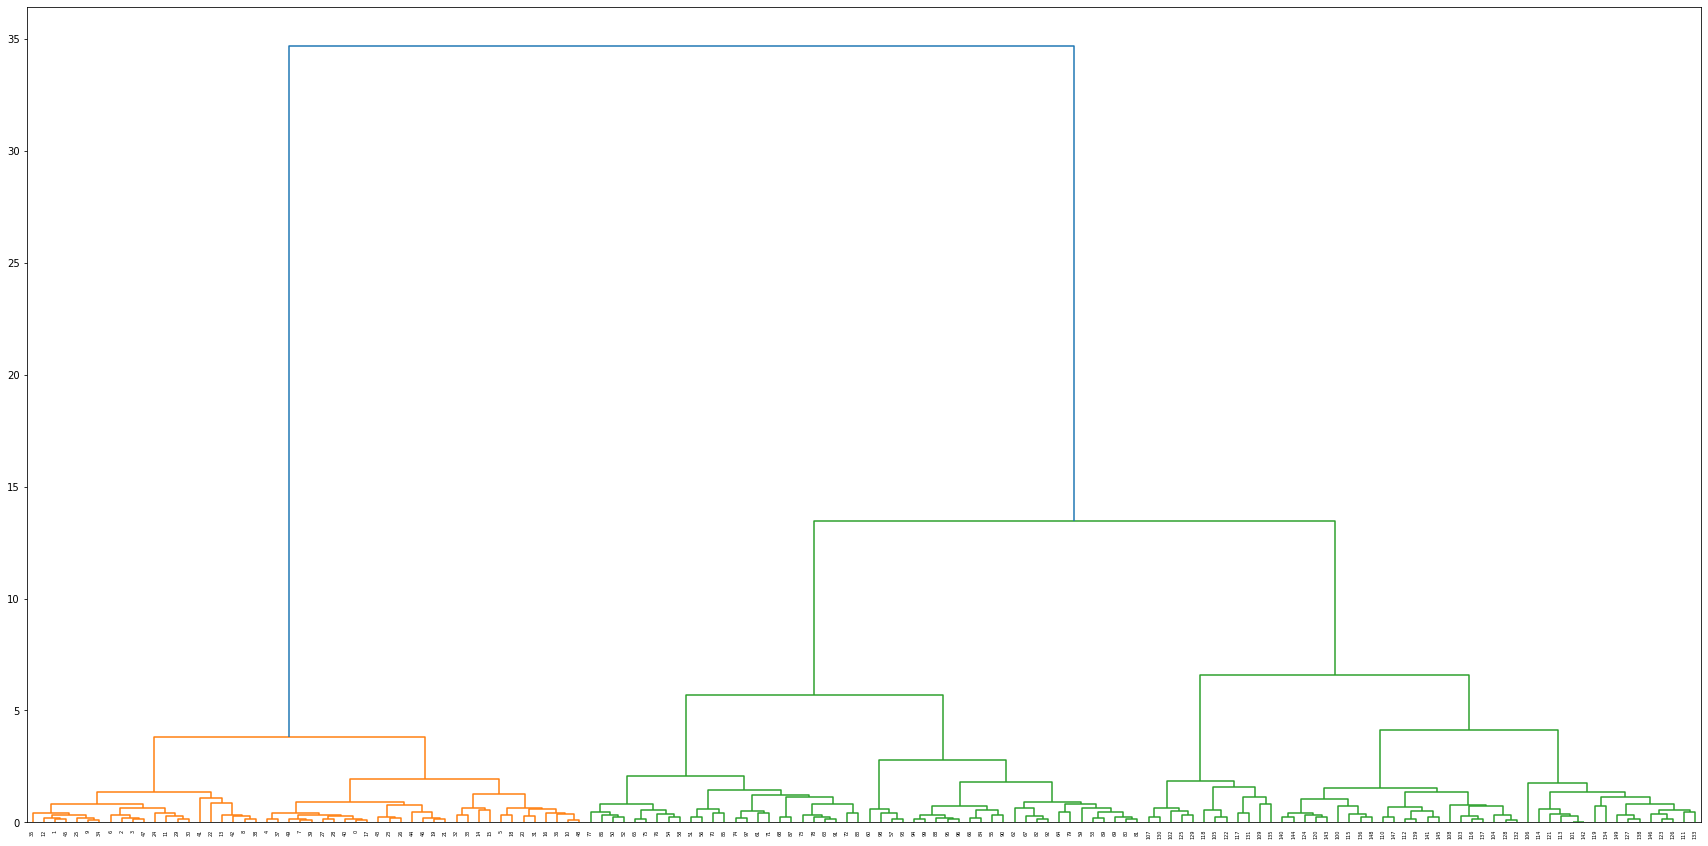

In [85]:
fig = plt.figure(figsize=(30, 15))
dn = dendrogram(Z)
plt.show()

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
دندوگرام را به کمک ارتباط هایی که در لینکیج به دست آمد ترسیم می کنیم.
در این روش همانطور که دیده میشود به صورت تجمیعی ابتدا هر داده یک خوشه تلقی شده سپس داده هایی که مشابعت بیشتری با هم دارند طبق تابع تعریف شده با هم ادغام می شوند و یک خوشه را می سازند.
    همینطور در مراحل بالاتر خوشه های مشابه با هم ادغام شده و ادامه می یابد تا در نهایت همه داده ها در یک خوشه قرار بگیرند.
    Z دربردارنده خوشه بندی ها در قالب یک ماتریس linkage است.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## c)

In [90]:
from scipy.cluster.hierarchy import fcluster

In [91]:
T = np.array(fcluster(Z, 6, criterion='distance'))
T

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [92]:
n6 = np.unique(T)
display(n6)
print('For level = 6 -> number of clusters = ',len(n6))

array([1, 2, 3, 4], dtype=int32)

For level = 6 -> number of clusters =  4


ئ<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
هر عضو این ارایه برچسب کلاستر آن نمونه در خوشه بندی است و 4 مقدار یکتا دارد یعنی 4 خوشه    
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## d)

In [78]:
from mpl_toolkits.mplot3d import Axes3D


In [53]:
for n_clust in range(1,6):
    Z = linkage(df,'ward')
    T = np.array(fcluster(Z, n_clust, criterion='distance'))
    n6 = np.unique(T)
    print('For level = ',n_clust,' -> number of clusters = ',len(n6))  


For level =  1  -> number of clusters =  26
For level =  2  -> number of clusters =  9
For level =  3  -> number of clusters =  7
For level =  4  -> number of clusters =  6
For level =  5  -> number of clusters =  5


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
همانطور که مشخص است هرچه level بیشتر می شود تعداد کلاستر کمتر می شود.
    به عنوان مثال اگر 4 قرار دهیم 6 خوشه تولید می شود که برحسب 3 ویژگی اول (یا 2 تا) به صورت زیر پلات می شوند.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


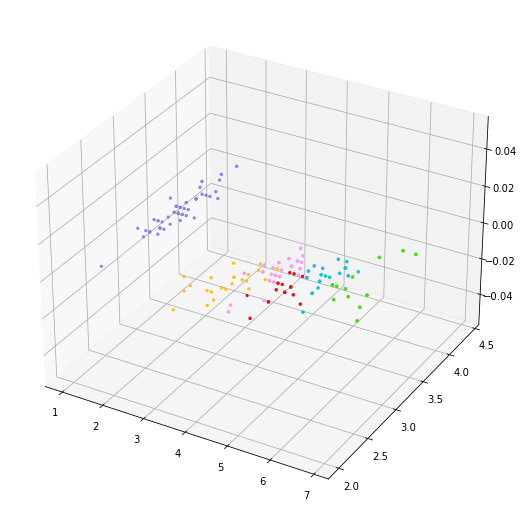

In [101]:
Z = linkage(df,'ward')
T = np.array(fcluster(Z, 4, criterion='distance'))

LABEL_COLOR_MAP = {0 : '#8282f5',
                   1 : '#ff94f3',
                   2 : '#ffc014',
                   3:  '#46db14',
                   4:  '#14c0db',
                   5:  '#db1414'
                   }

label_color = [LABEL_COLOR_MAP[l-1] for l in T]
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)

plt.scatter( df['petal length (cm)'],df['sepal width (cm)'] ,df['sepal length (cm)'],c=label_color,alpha=1)


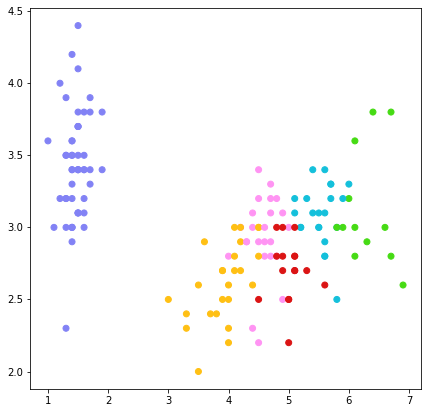

In [104]:
Z = linkage(df,'ward')
T = np.array(fcluster(Z, 4, criterion='distance'))

LABEL_COLOR_MAP = {0 : '#8282f5',
                   1 : '#ff94f3',
                   2 : '#ffc014',
                   3:  '#46db14',
                   4:  '#14c0db',
                   5:  '#db1414'
                   }

label_color = [LABEL_COLOR_MAP[l-1] for l in T]
fig = plt.figure(figsize=(7,7))
# ax = Axes3D(fig)

plt.scatter( df['petal length (cm)'],df['sepal width (cm)'], c=label_color,alpha=1)


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">

هر رنگ نمایانگر یک خوشه است.چون با لول 4 تغداد خوشه ها را 6 به دست آوردیم پس 6 رنگ دیده می شود.
همانطور که مشخص است نمونه هایی که به هم نزدیک تر هستند معمولا هم رنگ و در یک خوشه قرار گرفته اند.
البته گاهی هم تداخل رنگ هایی دیده می شود که خطای کلاسترینگ است و خوشه بندی را از دقت 100درضد دور می کند.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">
